# Pointwise Mutual Information (PMI): The Intuitive and Mathematical Foundation of Word Associations

## The Intuitive Core: Understanding Word Relationships

At its heart, PMI answers a deceptively simple question: **How surprised should we be when two words appear together?**

Think about your daily life. If you often see two friends together—let's call them Alex and Taylor—you wouldn't be surprised when they show up together at a party. But if you know that Alex and Jordan rarely interact, seeing them arrive together would be unexpected and informative.

Words work the same way! When "artificial" and "intelligence" frequently appear together in texts, it's expected. But if "artificial" and "banana" appear together, that's surprising and might signal something interesting.

Your brain is a prediction machine constantly calculating these probabilities unconsciously. When you hear "peanut butter and..." your brain immediately activates "jelly" because these words co-occur frequently. This is why PMI feels intuitive once you understand it—it mirrors how your own neural networks process language!

## The Mathematical Framework

PMI quantifies this surprise mathematically by comparing the actual co-occurrence probability of two events against what would be expected if they were independent.

The formal definition of PMI between two events x and y is:

$$I(x,y) = \log_2 \frac{P(x,y)}{P(x)P(y)}$$

When applied to words and their contexts, PMI becomes:

$$PMI(w,c) = \log_2 \frac{P(w,c)}{P(w)P(c)}$$

Let's break this down step by step:

1. **The numerator $P(w,c)$**: The joint probability of seeing word $w$ and context word $c$ together
2. **The denominator $P(w)P(c)$**: The probability of seeing word $w$ multiplied by the probability of seeing context word $c$

This denominator represents our null hypothesis—the expected probability if words appeared together purely by chance. The ratio $\frac{P(w,c)}{P(w)P(c)}$ tells us how many times more frequently the words co-occur than random chance would predict.

If words appear together exactly as often as random chance would predict, the ratio equals 1, and $\log_2(1) = 0$. No surprise!

If they appear together more often than chance, PMI is positive—they're "friends."
If they appear together less often than chance, PMI is negative—they "avoid each other."


The logarithm serves two purposes:
1. It transforms the ratio into a more manageable scale
2. It converts multiplication into addition, which is computationally advantageous



## Interpretation - Understanding PMI Values

The PMI score interpretation is quite intuitive:

**PMI > 0**: Words co-occur more frequently than expected by chance (positive association)

**PMI = 0**: Words co-occur exactly as often as expected by chance (independence)

**PMI < 0**: Words co-occur less frequently than expected by chance (negative association)



### 🔎 Target Words vs. Context Words
You might notice an asymmetry in the notation: $w$ is simply called "word" while $c$ is specifically called "context word." This distinction is deliberate and reflects their different roles:
>
>**Target Word ($w$)**: This is the focus of our analysis—the word whose meaning or associations we're trying to understand. It's the primary subject of investigation.
>**Context Word ($c$)**: This is a word that appears in proximity to our target word, helping to define its meaning and usage patterns. Context words create the environment that gives the target word its semantic properties.
>
>This naming convention reflects the distributional hypothesis in linguistics: a word's meaning is determined by the company it keeps. When studying the semantics of language, we often examine how target words ($w$) are distributed across different contexts, with context words ($c$) serving as the defining features of those contexts.
>For example, if our target word is "bank," context words like "river," "shore," and "fishing" suggest one meaning, while context words like "money," "loan," and "account" suggest another.

### 🔎 **What's the context window?**
>When calculating PMI, we typically define a "context window" which could be a fixed number of words, a sentence, or a paragraph. This context window determines >what we consider as "co-occurrence." For instance, with a window size of 5, we would say two words co-occur if they appear within 5 words of each other.


### 🔎 PMI and Synonyms
>The relationship between synonyms and PMI touches on an important linguistic phenomenon. Synonyms (words with similar meanings) often don't appear together in the same context—a principle known as **lexical substitution**. When writing, we typically choose one synonym over another in a given context.
>For instance, in a sentence, you would use either "happy" or "joyful," but rarely both together. This phenomenon is called __distributional substitutability__.
>As a result, PMI between perfect synonyms might actually be **low or even negative**, not zero as one might intuitively expect. They tend not to co-occur despite having similar meanings. This is because PMI measures co-occurrence patterns, not semantic similarity directly.



## Real-World Example: Computing PMI

Let's work through an example using real numbers. Looking at the table of co-occurrence counts:

| Word/Context | computer | data | result | pie | sugar | count(w) |
|--------------|----------|------|--------|-----|-------|----------|
| cherry       | 2        | 8    | 9      | 442 | 25    | 486      |
| strawberry   | 0        | 0    | 1      | 60  | 19    | 80       |
| digital      | 1670     | 1683 | 85     | 5   | 4     | 3447     |
| information  | 3325     | 3982 | 378    | 5   | 13    | 7703     |
| count(context) | 4997   | 5673 | 473    | 512 | 61    | 11716    |

Let's calculate PMI("information", "data"):

First, we need the probabilities:
- P(information, data) = 3982/11716 = 0.3399
- P(information) = 7703/11716 = 0.6575
- P(data) = 5673/11716 = 0.4842

Then:
$$PMI(\text{information}, \text{data}) = \log_2\frac{0.3399}{0.6575 \times 0.4842} = \log_2\frac{0.3399}{0.3184} = \log_2(1.0676) = 0.0944$$

This positive but small PMI tells us that "information" and "data" appear together slightly more often than we'd expect by chance—they have a mild association.

Now let's look at "cherry" and "pie":
- P(cherry, pie) = 442/11716 = 0.0377
- P(cherry) = 486/11716 = 0.0415
- P(pie) = 512/11716 = 0.0437

$$PMI(\text{cherry}, \text{pie}) = \log_2\frac{0.0377}{0.0415 \times 0.0437} = \log_2\frac{0.0377}{0.0018} = \log_2(20.94) = 4.38$$

This high PMI shows that "cherry" and "pie" co-occur much more frequently than random chance would predict—a strong association that aligns with our culinary intuitions!

## From PMI to PPMI: Focusing on the Positive

When working with real-world corpora, we often encounter negative PMI values. These occur when words appear together less frequently than expected by chance. However, there are three key issues with negative PMI values:

1. **Statistical reliability**: Determining with confidence that words truly co-occur less than chance requires enormous corpora, especially for rare words.

2. **Computational issues**: Negative PMI can range to negative infinity, particularly when dealing with unseen word combinations (where $P(w,c) = 0$).

3. **Application focus**: Many NLP applications primarily care about discovering positive associations, not negative ones.

This leads us to **Positive PMI (PPMI)**, which simply replaces all negative values with zero:

$$PPMI(w, c) = \max(PMI(w, c), 0)$$

This simple modification makes PPMI an incredibly useful tool for building word vectors in NLP.

## 🧠 Neuroscience Connection: The Positivity Bias

Interestingly, focusing on PPMI aligns with a quirk of human cognition. Your brain gives more weight to positive evidence than to negative evidence when forming associations. Psychologists call this "positive-testing strategy"—we look for confirming instances rather than disconfirming ones. PPMI models this cognitive bias by only considering positive associations!


## Matrix Operations: A Concrete Implementation

In practice, PPMI is typically computed for an entire term-term matrix at once. Let's break down each formula step-by-step:

Given a co-occurrence matrix $F$ with $W$ rows (words) and $C$ columns (contexts), where $f_{ij}$ gives the number of times word $w_i$ occurs with context $c_j$, we compute:

### 1. Joint Probability Matrix
$$p_{ij} = \frac{f_{ij}}{\sum_{i=1}^{W}\sum_{j=1}^{C}f_{ij}}$$

This first formula calculates the joint probability of each word-context pair. It divides each co-occurrence count by the total sum of all counts in the matrix. In simpler terms, it answers: "What fraction of all the word-context observations in our corpus is this specific word-context pair?"

For example, if "cherry" and "pie" occur together 442 times, and there are 11,716 total co-occurrences in our matrix, then:
$$p_{\text{cherry,pie}} = \frac{442}{11716} = 0.0377$$

### 2. Word Marginal Probability Vector
$$p_{i*} = \frac{\sum_{j=1}^{C}f_{ij}}{\sum_{i=1}^{W}\sum_{j=1}^{C}f_{ij}}$$

This formula calculates the marginal probability of each word by summing across all contexts for that word (the entire row) and dividing by the total counts. The notation $p_{i*}$ with the asterisk indicates that we're summing over all values of the second index (all contexts). This answers: "What fraction of all observations involve this word, regardless of context?"

For "cherry", this would be:
$$p_{\text{cherry,*}} = \frac{486}{11716} = 0.0415$$

### 3. Context Marginal Probability Vector
$$p_{*j} = \frac{\sum_{i=1}^{W}f_{ij}}{\sum_{i=1}^{W}\sum_{j=1}^{C}f_{ij}}$$

Similarly, this formula calculates the marginal probability of each context by summing down all words for that context (the entire column) and dividing by the total. The notation $p_{*j}$ indicates summing over all values of the first index (all words). It answers: "What fraction of all observations involve this context, regardless of word?"

For "pie", this would be:
$$p_{*,\text{pie}} = \frac{512}{11716} = 0.0437$$

### 4. Computing PPMI
$$PPMI_{ij} = \max\left(\log_2\frac{p_{ij}}{p_{i*}p_{*j}}, 0\right)$$

The final step brings everything together. For each cell in our matrix:

1. We divide the joint probability $p_{ij}$ by the product of the marginal probabilities $p_{i*}p_{*j}$.
2. This ratio tells us how many times more frequently the word-context pair co-occurs compared to what we'd expect if they were independent.
3. We take the $\log_2$ of this ratio to get the PMI value.
4. Finally, we apply the max function to keep only positive values (converting PMI to PPMI).

For "cherry" and "pie":
$$PPMI_{\text{cherry,pie}} = \max\left(\log_2\frac{0.0377}{0.0415 \times 0.0437}, 0\right) = \max(\log_2(20.94), 0) = 4.38$$

### Visual Interpretation


Think of these operations as transforming our raw count matrix into meaningful association scores:
- The first step normalizes all counts to probabilities
- The second and third steps calculate how common each word and context is individually
- The fourth step measures how surprising each co-occurrence is relative to what we'd expect by chance
- The max operation focuses our attention only on positive associations

This matrix-based approach is computationally efficient because it allows us to compute all PPMI values at once using vectorized operations, rather than calculating each word-context pair individually.




Here's a vectorized implementation using NumPy:

Word-Context Co-occurrence Matrix:


,computer,data,result,pie,sugar
cherry,2,8,9,442,25
strawberry,0,0,1,60,19
digital,1670,1683,85,5,4
information,3325,3982,378,5,13



💡 COMPUTING PPMI MATRIX - EDUCATIONAL WALKTHROUGH

🔍 INPUT CO-OCCURRENCE MATRIX:


,computer,data,result,pie,sugar
cherry,2,8,9,442,25
strawberry,0,0,1,60,19
digital,1670,1683,85,5,4
information,3325,3982,378,5,13


Matrix shape: (4, 5)

📊 ROW AND COLUMN STATISTICS:
• 'cherry' frequency: 486
• 'strawberry' frequency: 80
• 'digital' frequency: 3447
• 'information' frequency: 7703
• 'computer' frequency: 4997
• 'data' frequency: 5673
• 'result' frequency: 473
• 'pie' frequency: 512
• 'sugar' frequency: 61
• Total count of all co-occurrences: 11716

🧮 PROBABILITY MATRICES:
• Joint probabilities (P(word,context)):


,computer,data,result,pie,sugar
cherry,0.000171,0.000683,0.000768,0.037726,0.002134
strawberry,0.000000,0.000000,0.000085,0.005121,0.001622
digital,0.142540,0.143650,0.007255,0.000427,0.000341
information,0.283800,0.339877,0.032264,0.000427,0.001110



• Word probabilities (P(word)):
  - P('cherry') = 0.041482
  - P('strawberry') = 0.006828
  - P('digital') = 0.294213
  - P('information') = 0.657477

• Context probabilities (P(context)):
  - P('computer') = 0.426511
  - P('data') = 0.484210
  - P('result') = 0.040372
  - P('pie') = 0.043701
  - P('sugar') = 0.005207

🔬 EXPECTED PROBABILITIES UNDER INDEPENDENCE:
• This is what we'd expect if words and contexts appeared together purely by chance:


,computer,data,result,pie,sugar
cherry,0.017692,0.020086,0.001675,0.001813,0.000216
strawberry,0.002912,0.003306,0.000276,0.000298,0.000036
digital,0.125485,0.142461,0.011878,0.012857,0.001532
information,0.280421,0.318357,0.026544,0.028732,0.003423



📈 RATIO OF ACTUAL VS EXPECTED PROBABILITIES:
• Values > 1 mean words co-occur more than expected by chance
• Values < 1 mean words co-occur less than expected by chance


,computer,data,result,pie,sugar
cherry,0.01,0.03,0.46,20.81,9.88
strawberry,0.00,0.00,0.31,17.16,45.62
digital,1.14,1.01,0.61,0.03,0.22
information,1.01,1.07,1.22,0.01,0.32



🧠 PMI VALUES (log2 of the ratios):
• Positive values: stronger association than chance
• Negative values: weaker association than chance
• Values near 0: words appear together about as often as expected by chance


,computer,data,result,pie,sugar
cherry,-6.70,-4.88,-1.12,4.38,3.30
strawberry,0.00,0.00,-1.69,4.10,5.51
digital,0.18,0.01,-0.71,-4.91,-2.17
information,0.02,0.09,0.28,-6.07,-1.63



✨ FINAL PPMI MATRIX (max(PMI, 0)):
• Only keeping positive associations
• Values indicate strength of meaningful associations


,computer,data,result,pie,sugar
cherry,0.00,0.00,0.00,4.38,3.30
strawberry,0.00,0.00,0.00,4.10,5.51
digital,0.18,0.01,0.00,0.00,0.00
information,0.02,0.09,0.28,0.00,0.00


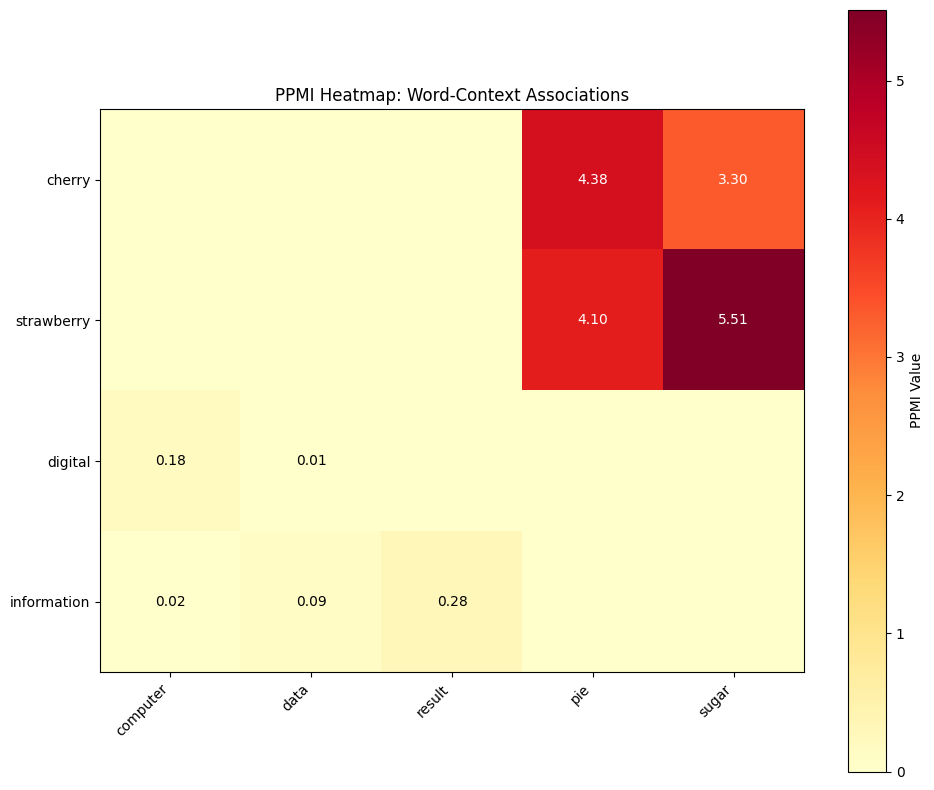

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import display

def compute_ppmi_matrix(co_occurrence_matrix, verbose=True, row_labels=None, col_labels=None):
    """
    Compute the PPMI matrix from a co-occurrence matrix with educational print statements
    
    Args:
        co_occurrence_matrix: matrix of word-context co-occurrence counts
        verbose: whether to print educational information
        row_labels: labels for the rows (words)
        col_labels: labels for the columns (contexts)
        
    Returns:
        PPMI matrix of same dimensions
    """
    if verbose:
        print("\n🔍 INPUT CO-OCCURRENCE MATRIX:")
        if row_labels is not None and col_labels is not None:
            display(pd.DataFrame(co_occurrence_matrix, index=row_labels, columns=col_labels))
        else:
            display(pd.DataFrame(co_occurrence_matrix))
        print(f"Matrix shape: {co_occurrence_matrix.shape}")
    
    # Get row and column sums
    row_sums = co_occurrence_matrix.sum(axis=1, keepdims=True)
    col_sums = co_occurrence_matrix.sum(axis=0, keepdims=True)
    total_sum = co_occurrence_matrix.sum()
    
    if verbose:
        print("\n📊 ROW AND COLUMN STATISTICS:")
        if row_labels is not None:
            for i, label in enumerate(row_labels):
                print(f"• '{label}' frequency: {row_sums.flatten()[i]}")
        else:
            print(f"• Row sums (word frequencies):\n{row_sums.flatten()}")
            
        if col_labels is not None:
            for i, label in enumerate(col_labels):
                print(f"• '{label}' frequency: {col_sums.flatten()[i]}")
        else:
            print(f"• Column sums (context frequencies):\n{col_sums.flatten()}")
            
        print(f"• Total count of all co-occurrences: {total_sum}")
    
    # Compute probabilities
    p_ij = co_occurrence_matrix / total_sum
    p_i_star = row_sums / total_sum
    p_star_j = col_sums / total_sum
    
    if verbose:
        print("\n🧮 PROBABILITY MATRICES:")
        print("• Joint probabilities (P(word,context)):")
        if row_labels is not None and col_labels is not None:
            display(pd.DataFrame(np.round(p_ij, 6), index=row_labels, columns=col_labels))
        else:
            display(pd.DataFrame(np.round(p_ij, 6)))
            
        print("\n• Word probabilities (P(word)):")
        if row_labels is not None:
            for i, label in enumerate(row_labels):
                print(f"  - P('{label}') = {p_i_star.flatten()[i]:.6f}")
        else:
            display(pd.DataFrame(np.round(p_i_star, 6)))
            
        print("\n• Context probabilities (P(context)):")
        if col_labels is not None:
            for i, label in enumerate(col_labels):
                print(f"  - P('{label}') = {p_star_j.flatten()[i]:.6f}")
        else:
            display(pd.DataFrame(np.round(p_star_j, 6)))
    
    # Expected probabilities under independence
    expected = np.dot(p_i_star, p_star_j)
    
    if verbose:
        print("\n🔬 EXPECTED PROBABILITIES UNDER INDEPENDENCE:")
        print("• This is what we'd expect if words and contexts appeared together purely by chance:")
        if row_labels is not None and col_labels is not None:
            display(pd.DataFrame(np.round(expected, 6), index=row_labels, columns=col_labels))
        else:
            display(pd.DataFrame(np.round(expected, 6)))
    
    # Avoid division by zero and log(0)
    ratio = np.zeros_like(p_ij)
    nonzero_mask = (expected > 0) & (p_ij > 0)
    ratio[nonzero_mask] = p_ij[nonzero_mask] / expected[nonzero_mask]
    
    if verbose:
        print("\n📈 RATIO OF ACTUAL VS EXPECTED PROBABILITIES:")
        print("• Values > 1 mean words co-occur more than expected by chance")
        print("• Values < 1 mean words co-occur less than expected by chance")
        if row_labels is not None and col_labels is not None:
            display(pd.DataFrame(np.round(ratio, 2), index=row_labels, columns=col_labels))
        else:
            display(pd.DataFrame(np.round(ratio, 2)))
    
    # Compute PMI and convert to PPMI
    pmi = np.zeros_like(ratio)
    pmi[nonzero_mask] = np.log2(ratio[nonzero_mask])
    
    if verbose:
        print("\n🧠 PMI VALUES (log2 of the ratios):")
        print("• Positive values: stronger association than chance")
        print("• Negative values: weaker association than chance")
        print("• Values near 0: words appear together about as often as expected by chance")
        if row_labels is not None and col_labels is not None:
            display(pd.DataFrame(np.round(pmi, 2), index=row_labels, columns=col_labels))
        else:
            display(pd.DataFrame(np.round(pmi, 2)))
    
    ppmi = np.maximum(pmi, 0)
    
    if verbose:
        print("\n✨ FINAL PPMI MATRIX (max(PMI, 0)):")
        print("• Only keeping positive associations")
        print("• Values indicate strength of meaningful associations")
        if row_labels is not None and col_labels is not None:
            display(pd.DataFrame(np.round(ppmi, 2), index=row_labels, columns=col_labels))
        else:
            display(pd.DataFrame(np.round(ppmi, 2)))
        
        # Create a heatmap for better visualization
        plt.figure(figsize=(10, 8))
        im = plt.imshow(ppmi, cmap='YlOrRd')
        plt.colorbar(label='PPMI Value')
        plt.title('PPMI Heatmap: Word-Context Associations')
        
        # Add word labels to y-axis
        if row_labels is not None:
            plt.yticks(range(len(row_labels)), row_labels)
        
        # Add context labels to x-axis
        if col_labels is not None:
            plt.xticks(range(len(col_labels)), col_labels, rotation=45, ha='right')
        
        # Add value annotations on the heatmap cells
        for i in range(len(ppmi)):
            for j in range(len(ppmi[0])):
                if ppmi[i, j] > 0:
                    text_color = 'black' if ppmi[i, j] < 3 else 'white'
                    plt.text(j, i, f'{ppmi[i, j]:.2f}', 
                             ha='center', va='center', color=text_color)
        
        plt.tight_layout()
        plt.show()
        
    return ppmi

# Create the example co-occurrence matrix from the text (same as in the document)
# Format: rows are words, columns are contexts
words = ['cherry', 'strawberry', 'digital', 'information']
contexts = ['computer', 'data', 'result', 'pie', 'sugar']

# Create the co-occurrence matrix based on the data from the document
co_occurrence_data = np.array([
    [2, 8, 9, 442, 25],      # cherry
    [0, 0, 1, 60, 19],       # strawberry
    [1670, 1683, 85, 5, 4],  # digital
    [3325, 3982, 378, 5, 13] # information
])

# Create a DataFrame for better display
co_occurrence_df = pd.DataFrame(co_occurrence_data, index=words, columns=contexts)
print("Word-Context Co-occurrence Matrix:")
display(co_occurrence_df)

# Run the educational PPMI computation
print("\n" + "="*50)
print("💡 COMPUTING PPMI MATRIX - EDUCATIONAL WALKTHROUGH")
print("="*50)
ppmi_matrix = compute_ppmi_matrix(co_occurrence_data, row_labels=words, col_labels=contexts)

## 🧪  try it yourself: Difference between PMI and Cosine Similarity
in the previous notebook we saw the cosine similarity. can you explain the difference between PMI and Cosine Similarity, how they work and what's the different goal they aim to? try to answer between looking at the answer.

## Answer:
The fundamental difference between PMI and cosine similarity lies in what they measure and how they represent words:

**1. Representation**:

>PMI works directly with co-occurrence statistics from a corpus
>
>Cosine similarity works with vector representations (embeddings) of words


**2. What they measure:**

>PMI measures how much more frequently two words appear together than would be expected by chance
>
>Cosine similarity measures the similarity of meaning or context based on the angle between word vectors


**3. Treatment of synonyms:**

>PMI might show low values for synonyms since they rarely co-occur
>
>Cosine similarity would typically show high values for synonyms because they appear in similar contexts

## The Rare Word Problem and Its Solution

One significant issue with PMI is its bias toward rare word combinations. If two rare words happen to co-occur even once, their PMI can be disproportionately high simply because their individual probabilities are so low.

To address this, researchers developed a modified version called PPMIα that adjusts the context probability:

$$PPMI_α(w, c) = \max(\log_2\frac{P(w, c)}{P(w)P_α(c)}, 0)$$

Where:
$$P_α(c) = \frac{count(c)^α}{\sum_c count(c)^α}$$

Setting α = 0.75 gives better performance by slightly increasing the probability of rare contexts, which reduces their PMI values.

Creating sample co-occurrence matrix...
Computing standard PMI (alpha=1.0)...
Computing PPMI with alpha=0.75...


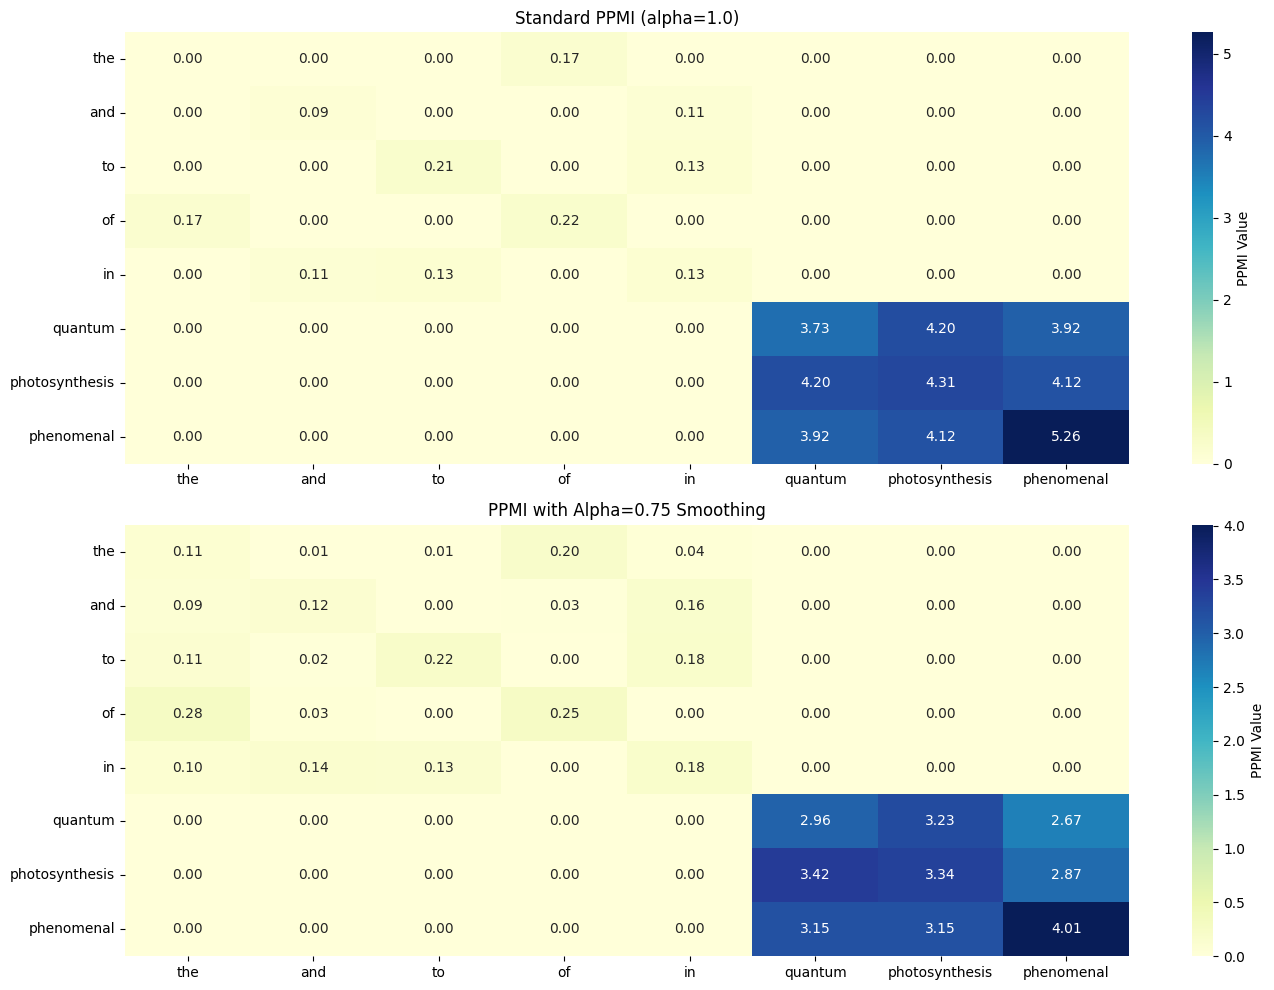


Difference between standard PMI and PPMI with alpha=0.75:


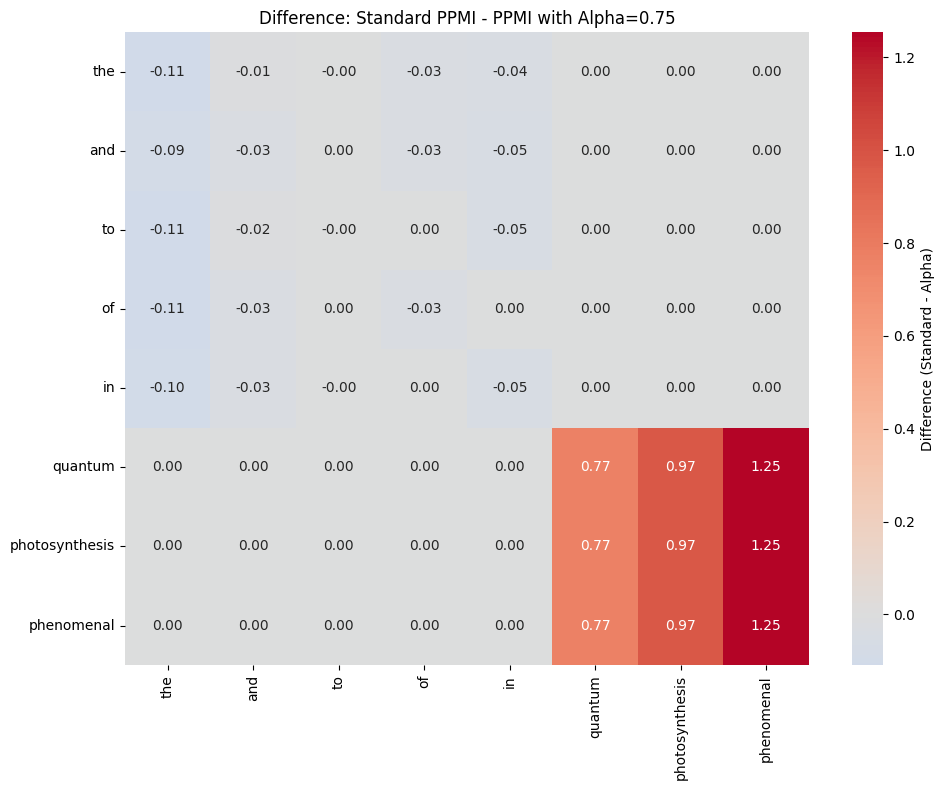


Impact Analysis on Rare vs Common Words:
Average PPMI (standard) for rare-to-common word pairs: 0.0000
Average PPMI (alpha=0.75) for rare-to-common word pairs: 0.0000
Difference: 0.0000

Average PPMI (standard) for rare-to-rare word pairs: 4.1978
Average PPMI (alpha=0.75) for rare-to-rare word pairs: 3.1991
Difference: -0.9987


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def compute_ppmi_alpha_matrix(co_occurrence_matrix, alpha=0.75):
    """
    Compute the PPMI_alpha matrix which handles rare words better
    
    Args:
        co_occurrence_matrix: matrix of word-context co-occurrence counts
        alpha: smoothing parameter, typically 0.75
        
    Returns:
        PPMI_alpha matrix of same dimensions
    """
    # Get row and column counts
    row_sums = co_occurrence_matrix.sum(axis=1, keepdims=True)
    col_counts = co_occurrence_matrix.sum(axis=0, keepdims=True)
    total_sum = co_occurrence_matrix.sum()
    
    # Compute standard probabilities
    p_ij = co_occurrence_matrix / total_sum
    p_i_star = row_sums / total_sum
    
    # Compute smoothed context probabilities
    col_counts_alpha = np.power(col_counts, alpha)
    p_alpha_j = col_counts_alpha / np.sum(col_counts_alpha)
    
    # Expected probabilities with smoothed context
    expected = np.dot(p_i_star, p_alpha_j)
    
    # Avoid division by zero and log(0)
    ratio = np.zeros_like(p_ij)
    nonzero_mask = (expected > 0) & (p_ij > 0)
    ratio[nonzero_mask] = p_ij[nonzero_mask] / expected[nonzero_mask]
    
    # Compute PMI and convert to PPMI
    pmi = np.zeros_like(ratio)
    pmi[nonzero_mask] = np.log2(ratio[nonzero_mask])
    ppmi_alpha = np.maximum(pmi, 0)
    
    return ppmi_alpha

# Create a demonstration with example data
def demonstrate_ppmi_alpha():
    # Generate a sample co-occurrence matrix
    # Rows represent target words, columns represent context words
    print("Creating sample co-occurrence matrix...")
    
    # Sample vocabulary: common and rare words
    words = ['the', 'and', 'to', 'of', 'in', 'quantum', 'photosynthesis', 'phenomenal']
    
    # Create sample co-occurrence counts
    # More realistic with common words appearing frequently and rare words less so
    co_occurrence = np.array([
        [100, 80, 75, 90, 85, 5, 2, 1],  # 'the' appears with other words
        [80, 70, 60, 65, 75, 3, 1, 1],   # 'and' appears with other words
        [75, 60, 65, 55, 70, 2, 1, 0],   # 'to' appears with other words
        [90, 65, 55, 75, 60, 4, 2, 0],   # 'of' appears with other words
        [85, 75, 70, 60, 80, 3, 1, 1],   # 'in' appears with other words
        [5, 3, 2, 4, 3, 10, 8, 3],       # 'quantum' appears with other words
        [2, 1, 1, 2, 1, 8, 5, 2],        # 'photosynthesis' appears with other words
        [1, 1, 0, 0, 1, 3, 2, 2]         # 'phenomenal' appears with other words
    ])
    
    # Compute standard PMI (alpha=1.0)
    print("Computing standard PMI (alpha=1.0)...")
    standard_pmi = compute_ppmi_alpha_matrix(co_occurrence, alpha=1.0)
    
    # Compute PPMI with alpha=0.75
    print("Computing PPMI with alpha=0.75...")
    ppmi_alpha = compute_ppmi_alpha_matrix(co_occurrence, alpha=0.75)
    
    # Create DataFrames for visualization
    standard_df = pd.DataFrame(standard_pmi, index=words, columns=words)
    alpha_df = pd.DataFrame(ppmi_alpha, index=words, columns=words)
    
    # Set up plots
    plt.figure(figsize=(14, 10))
    
    # Plot standard PMI
    plt.subplot(2, 1, 1)
    sns.heatmap(standard_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"label": "PPMI Value"})
    plt.title("Standard PPMI (alpha=1.0)")
    plt.tight_layout()
    
    # Plot PPMI with alpha smoothing
    plt.subplot(2, 1, 2)
    sns.heatmap(alpha_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"label": "PPMI Value"})
    plt.title("PPMI with Alpha=0.75 Smoothing")
    plt.tight_layout()
    
    # Show plot
    plt.savefig("ppmi_comparison.png")
    plt.show()
    
    # Compare the differences
    print("\nDifference between standard PMI and PPMI with alpha=0.75:")
    difference = standard_df - alpha_df
    
    # Display the differences
    plt.figure(figsize=(10, 8))
    sns.heatmap(difference, annot=True, fmt=".2f", cmap="coolwarm", center=0,
                cbar_kws={"label": "Difference (Standard - Alpha)"})
    plt.title("Difference: Standard PPMI - PPMI with Alpha=0.75")
    plt.tight_layout()
    plt.savefig("ppmi_difference.png")
    plt.show()
    
    # Analyze the impact on rare words
    print("\nImpact Analysis on Rare vs Common Words:")
    rare_words = ['quantum', 'photosynthesis', 'phenomenal']
    common_words = ['the', 'and', 'to', 'of', 'in']
    
    # Calculate average PMI values for rare and common words
    rare_to_common_standard = standard_df.loc[rare_words, common_words].mean().mean()
    rare_to_common_alpha = alpha_df.loc[rare_words, common_words].mean().mean()
    
    rare_to_rare_standard = standard_df.loc[rare_words, rare_words].mean().mean()
    rare_to_rare_alpha = alpha_df.loc[rare_words, rare_words].mean().mean()
    
    print(f"Average PPMI (standard) for rare-to-common word pairs: {rare_to_common_standard:.4f}")
    print(f"Average PPMI (alpha=0.75) for rare-to-common word pairs: {rare_to_common_alpha:.4f}")
    print(f"Difference: {rare_to_common_alpha - rare_to_common_standard:.4f}")
    
    print(f"\nAverage PPMI (standard) for rare-to-rare word pairs: {rare_to_rare_standard:.4f}")
    print(f"Average PPMI (alpha=0.75) for rare-to-rare word pairs: {rare_to_rare_alpha:.4f}")
    print(f"Difference: {rare_to_rare_alpha - rare_to_rare_standard:.4f}")
    
    # Return the matrices for additional analysis if needed
    return standard_df, alpha_df

# Run the demonstration
standard_pmi, ppmi_alpha = demonstrate_ppmi_alpha()

## Handling Sparse Data: Smoothing Techniques

Another approach to handling sparse data is Laplace smoothing (also called "add-k smoothing"), which adds a small constant $k$ (typically between 0.1 and 3) to each count in our co-occurrence matrix. 

Why is this useful? 
- **Prevents zero probabilities**: By adding a small value to each cell, we ensure no probability is exactly zero, which can cause mathematical problems in later calculations
- **Reduces noise**: Small, potentially random co-occurrences get less weight in the overall model
- **Handles unseen events**: Words that haven't appeared together in our training data still get a small probability of co-occurrence

The formula for Laplace smoothing is:

$$P_{smoothed}(word|context) = \frac{count(word, context) + k}{count(context) + k \times |V|}$$

Where $|V|$ is the vocabulary size (total number of unique words).

The value of $k$ controls the smoothing strength:
- Smaller $k$ (e.g., 0.1): Minimal smoothing, stays closer to original counts
- Larger $k$ (e.g., 3): More aggressive smoothing, pushes probabilities toward uniform distribution

## From Theory to Application: The Matrix-Based Semantic Model

The PPMI (Positive Pointwise Mutual Information) matrix forms the core of a sparse vector semantic model. In this representation:

- **Each row is a word vector**: Every word in our vocabulary gets its own vector (essentially a row in the matrix)
- **Each column represents a context**: Each possible context word has its own dimension
- **The value in each cell is the PPMI between the word and that context**: Higher values indicate stronger, more meaningful associations

For example, in the row for "coffee", the columns for contexts like "drink", "hot", and "morning" would have high PPMI values, while unrelated contexts like "keyboard" would have values close to zero.

This creates a *sparse* vector space, meaning most values are zero or very small, with only a few significant values for each word. The vector for each word essentially captures its "meaning fingerprint" based on usage patterns.

To compute the semantic similarity between two words (like "coffee" and "espresso"), we can use the cosine similarity between their vectors, as we saw in the previous notebook. Words with similar meanings will have similar context patterns and therefore similar vectors, resulting in high cosine similarity scores.



## 🧠 Memory Consolidation Activity

To help solidify this concept in your long-term memory, try this quick exercise:

1. Think of two words that you expect would have high PMI (words that often appear together)
2. Think of two words that would likely have PMI close to zero (unrelated words)
3. Can you think of a case where knowing the PMI between words might be useful in a real-world application?

## Practical Applications for NLP Engineers

PPMI and its derivatives are valuable in numerous applications:

### 1. Information Retrieval
PPMI vectors can be used to compute query-document similarity for search engines. By representing both queries and documents as vectors derived from PPMI weights, you can rank documents by their semantic relevance to queries.

### 2. Word Similarity and Semantic Analysis
PPMI-based vectors enable you to find semantically similar words, build thesauri, and discover word associations automatically. This is useful for query expansion, text enrichment, and automatic tagging.

### 3. Document Clustering and Classification
By aggregating word vectors into document representations (using techniques like centroids), you can cluster or classify documents based on semantic content rather than just keyword matching.

### 4. Detecting Semantic Change
By building PPMI matrices from different time periods, you can track how word meanings evolve—useful for historical linguistics, trend analysis, and maintaining up-to-date systems.

### 5. Downstream NLP Tasks
PPMI vectors provide strong baselines for many NLP tasks, including named entity recognition, part-of-speech tagging, and sentiment analysis. They can be particularly useful when labeled data is scarce.

### 6. Foundation for Neural Embeddings
PPMI matrices serve as theoretical underpinnings for modern neural word embeddings. In fact, Levy and Goldberg (2014) showed that word2vec's skip-gram with negative sampling (SGNS) implicitly factorizes a matrix of shifted PMI values.

## Engineering Limitations and Considerations

When implementing PMI-based systems, be aware of these practical constraints:

1. **Computational Complexity**: Computing the full PPMI matrix requires O(|V|²) space, where |V| is vocabulary size. For large vocabularies, this becomes prohibitively expensive.

2. **Sparsity Challenges**: Most word-context pairs never occur, resulting in extremely sparse matrices that require special storage formats (like scipy.sparse).

3. **Preprocessing Impact**: Choices in tokenization, window size, and stopword filtering dramatically affect the resulting PPMI values.

4. **Parameter Tuning**: The context window size significantly impacts the semantic properties of your vectors—smaller windows (1-2 words) capture syntactic relationships, while larger windows (5-10 words) capture topical relationships.

5. **Out-of-Vocabulary Words**: PPMI provides no natural way to handle words not seen during training, unlike more recent subword-based methods.

## Implementation Best Practices

When implementing PMI-based systems in production:

1. **Use sparse matrix formats**: SciPy's CSR or COO formats efficiently represent the mostly-zero PPMI matrices.

2. **Implement streaming computation**: For large corpora, compute co-occurrences incrementally without holding the entire corpus in memory.

3. **Parallelize matrix operations**: PPMI computation can be efficiently parallelized across multiple cores or machines.

4. **Cache intermediate results**: Store co-occurrence counts and marginals separately from the final PPMI values for flexibility.

5. **Consider approximate methods**: For extremely large vocabularies, approximate nearest neighbor techniques (like Locality-Sensitive Hashing) make similarity queries tractable.

## Moving Beyond: From PPMI to Dense Embeddings

While PPMI-based word vectors are powerful, they create sparse vectors (mostly filled with zeros). The next evolution in word representations involved creating dense embeddings like word2vec, GloVe, and contextual models like BERT. These approaches address many limitations of PPMI:

1. They reduce dimensionality from vocabulary size (often 50,000+) to typically 50-1000 dimensions
2. They capture latent semantic relationships more effectively
3. They generalize better to unseen data
4. They're more computationally efficient for downstream tasks

Nevertheless, understanding PPMI remains essential because:
- It provides the theoretical foundation for many embedding techniques
- It offers an interpretable baseline for evaluation
- In some specialized domains with limited data, PPMI can still outperform neural methods
- PPMI's explicit counting provides transparency that implicit neural approaches lack

## Advanced Theoretical Connections

For those interested in the deeper mathematics:

1. PMI is closely related to Kullback-Leibler (KL) divergence, measuring how the joint distribution P(w,c) differs from what would be expected under independence.

2. The connection between PPMI and word2vec can be formalized: the skip-gram objective with negative sampling approximates the factorization of a matrix where each cell contains the PMI between a word and context shifted by log(k) (where k is the number of negative samples).

3. PMI has information-theoretic interpretations: it represents the reduction in uncertainty about one word given the occurrence of another.

## 🧠 Final Neuroscience Insight

Just as your brain builds rich associative networks where concepts are connected by strength of co-occurrence and contextual relevance, PMI-based word representations mirror this biological architecture. In both cases, meaning emerges from patterns of association, not from any inherent properties of the individual units (be they neurons or words). This parallel between artificial and biological intelligence is why these statistical approaches to language have proven so powerful—they approximate how your own brain processes and organizes information!

## Resources for Further Learning

To deepen your understanding of PMI and its applications in NLP:

1. **Original Papers**:
   - Church & Hanks (1990): "Word Association Norms, Mutual Information, and Lexicography"
   - Levy & Goldberg (2014): "Neural Word Embedding as Implicit Matrix Factorization"

2. **Implementations**:
   - Gensim library provides efficient implementations of word-context matrices
   - scikit-learn offers vectorization utilities compatible with PMI computation

3. **Advanced Topics**:
   - Explore extensions like Shifted PMI (SPMI) and Symmetric PPMI (SPPMI)
   - Study how PMI values can be used with SVD for dimensionality reduction (like in LSA)

4. **Benchmark Datasets**:
   - WordSim-353 and SimLex-999 let you evaluate the quality of your PMI-based vectors

By mastering PMI and PPMI, you're building a solid foundation for understanding both classic and cutting-edge NLP techniques. These concepts provide the statistical intuition that will help you develop and debug advanced word embedding systems throughout your career as an NLP engineer.